# TO DO

1. Train on GPU, check that performance is good and save model paths on multiple epochs for students
2. Use the code as solution and paste a new version of the notebook for students with blanks to fill
3. Add more comments and pedagogical explanations

In [1]:
#Maybe replace "%" with "!" if it is not working, it depends on the python version you are using
!pip install numpy
!pip install nibabel
!pip install matplotlib
!pip install SimpleITK
!pip install torch torchvision torchaudio
!pip install torchsummary
!pip install scikit-learn
!pip install scikit-image
!pip install pandas
!pip install tqdm

# Exercise 1: Study of the Dataset, Train/Val/Test Split, and Visualization

In this exercise, we will explore the dataset. We have paired MRI and CT scans of different patients in NIfTI format (.nii.gz). Our goal is to become familiar with the data, divide it into training, validation, and test sets, and visualize some samples using nibabel and matplotlib.

Nibabel is a python library that allows us to read NIfTI formatted files which are commonly used in medical imaging. Matplotlib is a plotting library for creating static, interactive, and animated visualizations in Python.

Let's start by loading the data and examining it.

## Sub-Exercise 1: Patient Folder Analysis

In this sub-exercise, we will analyze the directory structure of our dataset. Our dataset is organized into subfolders, with each subfolder representing a patient and containing paired MRI and CT images. Let's print the total number of patients and display the content of one patient's folder to get a better understanding of the data structure.


In [1]:
import os 

# Define the directory containing the dataset
data_dir = "/home/aleroy/tps/data"

# List all patient folders
# os.listdir() returns a list of all files and folders in a directory. os.path.join() joins two paths together.
patient_folders = [os.path.join(data_dir, patient) for patient in os.listdir(data_dir)]

# Print the total number of patients. len() returns the length of a list.
print(f"Total number of patients: {len(patient_folders)}")

# Display the contents of one patient's folder
example_patient_folder = patient_folders[10]
print(f"Contents of example patient's folder '{example_patient_folder}':")
print(os.listdir(example_patient_folder))


Total number of patients: 186
Contents of example patient's folder '/home/aleroy/tps/data/200917074MG':
['200917074MG_MR1_T1.nii.gz', '200917074MG_CT.nii.gz']


## Sub-Exercise 2: Loading and Visualizing Patient Data

In this sub-exercise, we will load MRI and CT data of a specific patient and visualize it. This will help us get a better understanding of the kind of data we will be working with.


Shape of the MRI scan: (224, 224, 140)
Shape of the CT scan: (224, 224, 140)


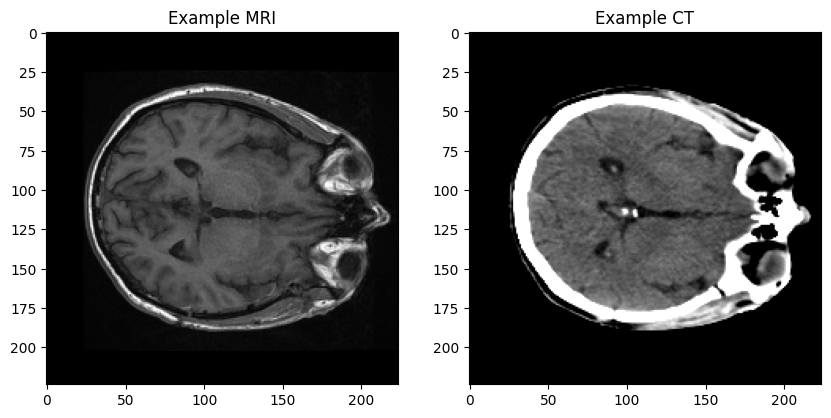

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt 

# Load an example MRI and CT scan of a specific patient
example_ct = nib.load(os.path.join(example_patient_folder, os.path.basename(example_patient_folder) + "_CT.nii.gz"))
example_mri = nib.load(os.path.join(example_patient_folder, os.path.basename(example_patient_folder) + "_MR1_T1.nii.gz"))

# Print the shape of the MRI and CT scans. .shape returns the shape of a numpy array.
print(f"Shape of the MRI scan: {example_mri.shape}")
print(f"Shape of the CT scan: {example_ct.shape}")

# Visualize the MRI and CT scans
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(example_mri.get_fdata()[:, :, example_mri.shape[2] // 2], cmap='gray')
plt.title("Example MRI")
plt.subplot(1, 2, 2)
plt.imshow(example_ct.get_fdata()[:, :, example_ct.shape[2] // 2], cmap='gray')
plt.title("Example CT")
plt.show()


## Sub-Exercise 3: Train/Val/Test Split

In this sub-exercise, we will divide the dataset into three parts: training, validation, and test sets. The training set is used to train the model, the validation set is used to tune the hyperparameters and evaluate the model during training, and the test set is used to evaluate the model's performance after training.

We will randomly split the dataset into these three sets and print some statistics about the split, such as the number of patients in each set and their IDs.


In [3]:
from sklearn.model_selection import train_test_split
# the sklearn.model_selection module contains classes and functions for splitting the dataset into training, validation, and test sets.

# Split the data into training, validation, and test sets (e.g., 80%, 10%, 10%)
train_folders, temp_folders = train_test_split(patient_folders, test_size=0.2, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)
# random_state=42 ensures that the split is always the same. This is useful for reproducibility. 
# The proportion of patients in each set is 80%, 10%, 10% because test_size=0.2 for train/(val+test) and test_size=0.5 for val/test.
# Here we don't stratify the split based on the label to have , for example, the same proportion of patients with and without cancer in each set. 
# This is because our task is image synthesis, not classification or segmentation. We don't have labels for the images.

# Print statistics about the split
print(f"Number of patients in the training set: {len(train_folders)}")
print(f"Number of patients in the validation set: {len(val_folders)}")
print(f"Number of patients in the test set: {len(test_folders)}")

print("\nPatient IDs in the training set:")
print([os.path.basename(folder) for folder in train_folders])

print("\nPatient IDs in the validation set:")
print([os.path.basename(folder) for folder in val_folders])

print("\nPatient IDs in the test set:")
print([os.path.basename(folder) for folder in test_folders])


Number of patients in the training set: 148
Number of patients in the validation set: 19
Number of patients in the test set: 19

Patient IDs in the training set:
['201000460PA', '200805333ET', '200812120TH', '201017578NE', '200605801BE', '200809932RU', '201002036RR', '200809903NF', '9010382FS', '200600916EN', '201002318UN', '200609937UL', '201103285BS', '200900372DS', '201000229TN', '201006083ZZ', '201214233WW', '201009189MB', '201003448BZ', '200901241XH', '201007683HT', '200815008EA', '201216360AK', '200912185KE', '201005615ZW', '201407785SE', '200909302FK', '200906524KR', '201016836HT', '200814463KX', '200900893NA', '201106485HW', '200813981PX', '201012465AL', '200713067GA', '201205896RM', '201616138KG', '201302800TX', '201316155EM', '201009206ZS', '200913019FK', '200703078HN', '200815477SX', '200812724GK', '201005262WG', '200917074MG', '201315112TX', '200416041WM', '200908517PW', '201016061UT', '200916815PR', '200911554HS', '200601174AU', '200907480MA', '201201260RX', '201015611UN',

# Exercise 2: Implementation of the Model in PyTorch

We will be using a 2D U-Net architecture for this task. U-Net is a popular deep learning architecture used in medical imaging for its ability to capture both low-level and high-level features through a series of contracting and expanding layers.

In this exercise, we will implement the 2D U-Net model using PyTorch, a popular deep learning framework.

We will build the U-Net architecture step by step, and finally, create a full model.
This implementation is based on the original U-Net architecture with skip connections between the encoder and decoder parts. It has an encoding path that captures the context, and a decoding path that enables precise localization. The input and output channels are set as parameters for flexibility. The model is also set to run on a GPU if available, otherwise, it falls back to CPU.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Decoder
        self.dec1 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec3 = self.conv_block(128, 64)
        
        # Maxpool
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Upsample layers
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        
        # Output layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoding path
        x1 = self.enc1(x)
        x2 = self.enc2(self.maxpool(x1))
        x3 = self.enc3(self.maxpool(x2))
        x4 = self.enc4(self.maxpool(x3))
        
        # Decoding path
        x = self.up1(x4)
        x = torch.cat([x, x3], dim=1)
        x = self.dec1(x)
        
        x = self.up2(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec2(x)
        
        x = self.up3(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec3(x)
        
        # Output layer
        x = self.out(x)
        return x

    def conv_block(self, in_channels, out_channels):
        # Convolutional block with two conv layers followed by ReLU activations
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

# Create the U-Net model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=1, out_channels=1).to(device)


# Exercise 3: Study of the Model Architecture

In this exercise, we will explore the architecture of the model we just implemented. Understanding the architecture helps in knowing how the model transforms the input through various layers to produce the output.

We will use `torchsummary` for this purpose. It gives a detailed view of the model’s layers, output shapes, and the number of parameters. What are the heaviest layers? How many parameters does the model have? 


In [5]:
from torchsummary import summary

# Assuming input size is [1, 224, 224] for 2D slices
summary(model, input_size=(1, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             640
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# Exercise 4: Loss Function and Optimizer

In this exercise, we will define the loss function and optimizer for our model. The loss function quantifies how well the predictions of the model match the true values, and the optimizer is an algorithm for adjusting the internal parameters to minimize the loss.

We will look into two common loss functions for image synthesis tasks:

1. **Mean Absolute Error (MAE)**: It computes the average of the absolute differences between the predicted and actual values. It is given by the formula:

    $$\text{MAE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n \left| y_i - \hat{y}_i \right|$$

    where $y$ is the ground truth and $\hat{y}$ is the predicted value.

2. **Mean Squared Error (MSE)**: It computes the average of the squared differences between the predicted and actual values. It is given by the formula:

    $$\text{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

    where $y$ is the ground truth and $\hat{y}$ is the predicted value.

You can choose either of these loss functions for training. MSE is more sensitive to outliers than MAE, but it penalizes large errors more than MAE. In the code, we will leave the option to choose between MSE and MAE.

For the optimizer, we will use Adam. The optimizer is responsible for updating the model's parameters during training, by propagating and derivating the error from the loss through all the layers. Adam is a popular optimizer, which is a variant of gradient descent. It is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. The learning rate determines how fast the model learns. A low learning rate might result in slow learning, while a high learning rate might result in unstable training. Adam adapts the learning rate for each parameter individually, allowing the model to quickly learn the parameters for the most significant features, while slowly learning the parameters for the less significant ones.

In [8]:
loss_function_option = 'MAE' # choose either 'MAE' or 'MSE'

if loss_function_option == 'MAE':
    loss_function = nn.L1Loss()
elif loss_function_option == 'MSE':
    loss_function = nn.MSELoss()
else:
    raise ValueError("Choose either 'MAE' or 'MSE' for loss_function_option.")

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Exercise 5: Dataset and Dataloader

In this exercise, we will create a custom dataset class for loading our MRI and CT scan pairs. We will also define dataloaders for efficient loading and batching of the data during training.
This is really important to define datasets and dataloaders in PyTorch. Datasets are used to load the data, and dataloaders are used to load the data in batches. This is important because we cannot load the entire dataset into memory at once, especially when working with large datasets. Dataloaders allow us to load the data in batches, which is more memory-efficient and allows us to train the model for a longer time. We will use the class `torch.utils.data.Dataset` to create a custom dataset class. This class allows us to load the data from the disk and return it in the form of a sample. We will also use the class `torch.utils.data.DataLoader` to create a dataloader. This class allows us to load the data in batches and shuffle it during training.

What is at stake here is that we have 3D volumes in the data folder but we want to work with 2D slices. So the dataset class will load the 3D volumes and extract all 2D slices. The dataloader will then load the 2D slices in batches.

In [9]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MRCTDataset(Dataset):
    def __init__(self, folders):
        super(MRCTDataset, self).__init__()
        self.folders = folders
        self.slice_paths = []
        
        # Iterate through each folder and store paths to all slices
        for folder in folders:
            mri_path = os.path.join(folder, os.path.basename(folder) + "_MR1_T1.nii.gz")
            ct_path = os.path.join(folder, os.path.basename(folder) + "_CT.nii.gz")
            # Assume that MRI and CT have the same number of slices along the z-axis
            num_slices = nib.load(mri_path).shape[2]
            for z in range(num_slices):
                self.slice_paths.append((mri_path, ct_path, z))

    def __len__(self):
        return len(self.slice_paths)

    def __getitem__(self, idx):
        # Load MRI and CT volumes
        mri_path, ct_path, z = self.slice_paths[idx]
        mri_vol = nib.load(mri_path).get_fdata()
        ct_vol = nib.load(ct_path).get_fdata()

        # Extract the 2D slices
        mri_slice = mri_vol[:, :, z]
        ct_slice = ct_vol[:, :, z]
        
        # Add channel dimension
        mri_slice = mri_slice[np.newaxis, ...]
        ct_slice = ct_slice[np.newaxis, ...]
        
        # Convert the slices to tensor
        mri_slice = torch.from_numpy(mri_slice).float()
        ct_slice = torch.from_numpy(ct_slice).float()
        
        # Return a dictionary of MRI and CT slices
        return {'MRI': mri_slice, 'CT': ct_slice}

# Create Dataset and Dataloader
train_dataset = MRCTDataset(train_folders)
val_dataset = MRCTDataset(val_folders)
test_dataset = MRCTDataset(test_folders)

batch_size = 32 # You can adjust this value depending on your GPU memory

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# We set shuffle to True for the training Dataloader to ensure that the data is shuffled before each epoch


# Exercise 6: Training the Model

In this exercise, we will train the model using the dataset we prepared. During training, we will iterate over the dataset in batches, perform forward and backward passes through the model, and update the model's weights.


In [21]:
import tqdm
import matplotlib.pyplot as plt
import datetime

num_epochs = 2

# Placeholders for loss history
train_loss_history = []
val_loss_history = []

# Training loop
for epoch in range(num_epochs):
    
    # Set the model to training mode
    model.train()
    
    # Progress bar
    train_loss = 0
    with tqdm.tqdm(total=len(train_dataloader), desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch") as pbar:
        for batch in train_dataloader:
            # Zero the gradients
            optimizer.zero_grad()

            # Move data to device
            mri = batch["MRI"].to(device)
            ct = batch["CT"].to(device)

            # Forward pass
            outputs = model(mri)

            # Compute the loss
            loss = loss_function(outputs, ct)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update the progress bar
            pbar.update(1)
            pbar.set_postfix({"training_loss": loss.item()})
            
    # Compute average training loss
    avg_train_loss = train_loss / len(train_dataloader)
    train_loss_history.append(avg_train_loss)
    print(f"Average Training Loss: {avg_train_loss}")
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            # Move data to device
            mri = batch["MRI"].to(device)
            ct = batch["CT"].to(device)

            # Forward pass
            outputs = model(mri)

            # Compute the loss
            loss = loss_function(outputs, ct)
            val_loss += loss.item()
            
    # Compute the average validation loss
    avg_val_loss = val_loss / len(val_dataloader)
    val_loss_history.append(avg_val_loss)
    print(f"Validation Loss: {avg_val_loss}")

    # Visualizing predictions
    if epoch % 1 == 0: # Change this value to visualize less often if needed
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(mri[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Input MRI")
        
        plt.subplot(1, 3, 2)
        plt.imshow(ct[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Ground Truth CT")
        
        plt.subplot(1, 3, 3)
        plt.imshow(outputs[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Predicted CT")
        plt.show()

# Plotting training and validation loss
plt.figure()
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#save model with date, time and number of epochs
torch.save(model.state_dict(), "./model_{}_{}.pt".format(datetime.datetime.now().strftime("%m/%d-%Hh%M"), num_epochs))


Epoch 1/2:  20%|█▉        | 127/642 [34:57<2:21:44, 16.51s/batch, training_loss=0.114]


KeyboardInterrupt: 

In [ ]:
torch.cuda.empty_cache()
del model
del optimizer

# Exercise 7: Load a Pretrained Model and Make Predictions

After training a model, it's often useful to save the model parameters to use them later. In this exercise, we will learn how to load a pre-trained model and use it to make predictions.
we start by loading the pretrained model's weights using torch.load(). We set the model to evaluation mode by calling model.eval(). We then iterate through the test set using the test_dataloader and make predictions using the model. We visualize a few examples by plotting the input MRI, the ground truth CT, and the predicted synthetic CT side by side for comparison. The number of visualizations is controlled by the variable num_visualizations.


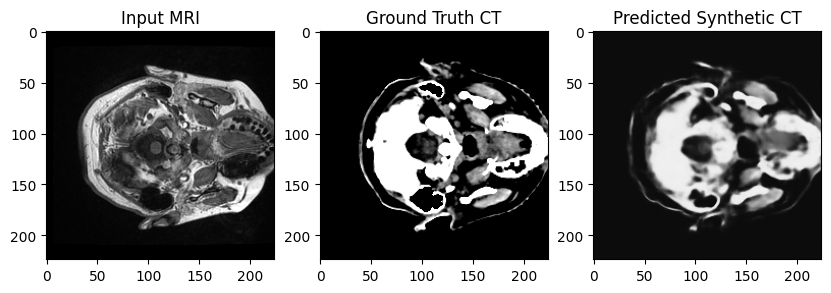

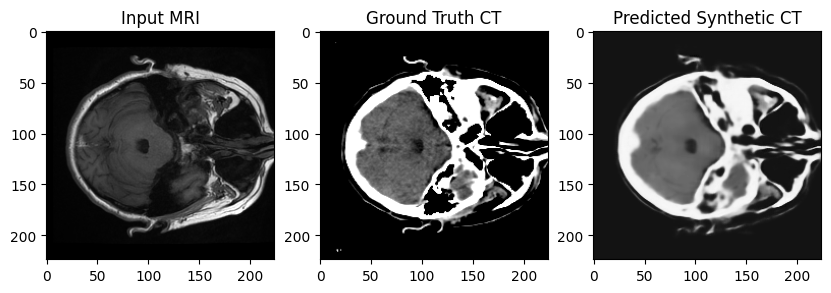

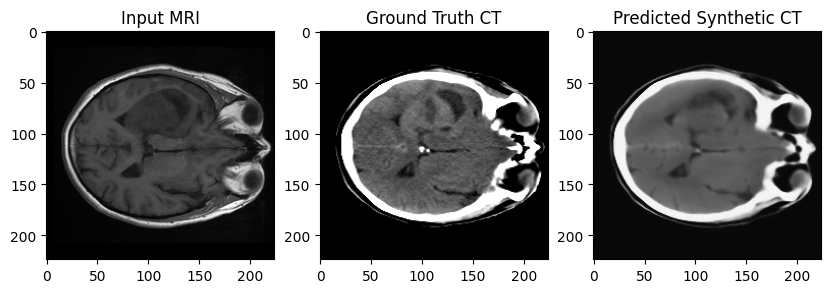

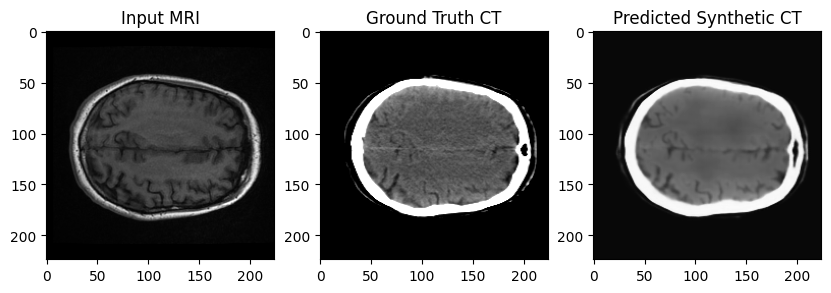

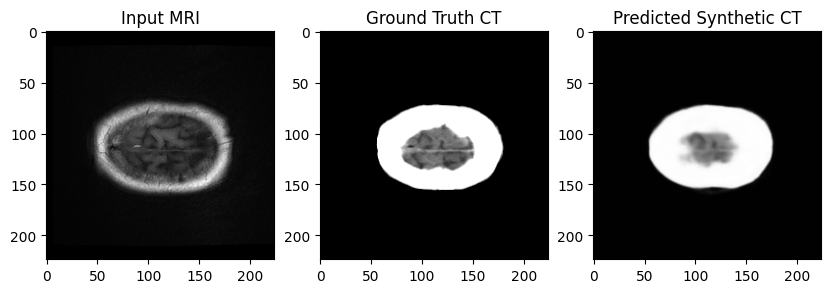

In [10]:
# Load the pre-trained model
path_model = "/home/aleroy/tps/model_gpu_06_21-15h55_30_MSE.pt" # Specify the path to your saved model
model = UNet(in_channels=1, out_channels=1).to(device)
model.load_state_dict(torch.load(path_model, map_location=device))

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set and visualize comparisons
num_visualizations = 5 # Number of examples to visualize

with torch.no_grad():
    for i, batch in enumerate(test_dataloader):
        # Stop after certain number of visualizations
        if i >= num_visualizations:
            break
        
        # Move data to device
        mri = batch["MRI"].to(device)
        ct = batch["CT"].to(device)

        # Make predictions
        outputs = model(mri)

        # Visualization
        plt.figure(figsize=(10, 5))
        
        # Input MRI
        plt.subplot(1, 3, 1)
        plt.imshow(mri[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Input MRI")
        
        # Ground Truth CT
        plt.subplot(1, 3, 2)
        plt.imshow(ct[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Ground Truth CT")
        
        # Predicted Synthetic CT
        plt.subplot(1, 3, 3)
        plt.imshow(outputs[0, 0, :, :].cpu(), cmap="gray")
        plt.title("Predicted Synthetic CT")
        
        plt.show()


## Exercise 8: Compute and Understand Metrics

In this exercise, we will evaluate the performance of our trained model using different similarity metrics. We will compute these metrics on the training, validation, and test datasets. The following are the metrics that we will be computing:

1. **Mean Squared Error (MSE)**: It is the average of the squares of the differences between the predicted and actual pixel values. It is given by:
    $$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (Y_{i} - \hat{Y}_{i})^2$$
   where $Y_{i}$ is the actual value, $\hat{Y}_{i}$ is the predicted value, and $N$ is the number of pixels.

2. **Mean Absolute Error (MAE)**: It is the average of the absolute differences between the predicted and actual pixel values. It is given by:
    $$\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |Y_{i} - \hat{Y}_{i}|$$
   where $Y_{i}$ is the actual value, $\hat{Y}_{i}$ is the predicted value, and $N$ is the number of pixels.

3. **Structural Similarity Index (SSIM)**: It is used to measure the similarity between two images. SSIM considers changes in structural information, luminance, and texture. A value of 1 indicates perfect similarity.
    $$\text{SSIM}(x, y) = \frac{(2\mu_x \mu_y + c_1)(2\sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)}$$

4. **Peak Signal-to-Noise Ratio (PSNR)**: It is used to measure the quality of reconstruction. It is defined as:
    $$\text{PSNR} = 10 \cdot \log_{10} \left(\frac{\text{MAX}_I^2}{\text{MSE}}\right)$$
   where $\text{MAX}_I$ is the maximum possible pixel value of the image.

Higher SSIM and PSNR values and lower MSE and MAE indicate better performance. It's essential to notice that these metrics have limitations. For instance, a low MSE or MAE doesn't always guarantee high perceptual quality. Similarly, SSIM and PSNR might not always correlate with human judgment on image quality.


In [11]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Function to compute metrics
def compute_metrics(true, pred):
    # Mean Squared Error
    mse = np.mean((true - pred) ** 2)
    
    # Mean Absolute Error
    mae = np.mean(np.abs(true - pred))
    
    # Structural Similarity Index
    s = ssim(true[:,0,:,:], pred[:,0,:,:], channel_axis=0)
    
    # Peak Signal-to-Noise Ratio
    psnr = 20 * np.log10(np.max(true)) - 10 * np.log10(mse)
    
    return mse, mae, s, psnr

test_only = True # Set this to True to skip computing metrics on training/val and only test the model

if test_only:
    metrics = {"test": []}
    list_loader = [("test", test_dataloader)]
else:
    metrics = {"train": [], "val": [], "test": []}
    list_loader = [("train", train_dataloader), ("val", val_dataloader), ("test", test_dataloader)]


# Compute metrics for each dataset
for phase, loader in list_loader:
    mse_list, mae_list, ssim_list, psnr_list = [], [], [], []
    with torch.no_grad():
        for batch in loader:
            # Move data to device
            mri = batch["MRI"].to(device)
            ct = batch["CT"].to(device)

            # Make predictions
            outputs = model(mri)

            # Move data to cpu for metric computation
            ct = ct.cpu().numpy()
            outputs = outputs.cpu().numpy()
            
            # Compute metrics
            mse, mae, s, psnr = compute_metrics(ct, outputs)
            
            # Append to lists
            mse_list.append(mse)
            mae_list.append(mae)
            ssim_list.append(s)
            psnr_list.append(psnr)
            
    
    # Store average metrics
    metrics[phase] = {
        "MSE": np.mean(mse_list),
        "MAE": np.mean(mae_list),
        "SSIM": np.mean(ssim_list),
        "PSNR": np.mean(psnr_list)
    }

# Print metrics
for phase, values in metrics.items():
    print(f"{phase.upper()} - MSE: {values['MSE']:.4f}, MAE: {values['MAE']:.4f}, SSIM: {values['SSIM']:.4f}, PSNR: {values['PSNR']:.4f}")


# Exercise 9: Improving the Model with Perceptual Loss (Bonus)

In this exercise, we will explore the concept of Perceptual Loss and see how it can be used to improve the performance of our model.

Perceptual Loss, also known as Feature Loss or VGG Loss, is used to measure perceptual differences between the predicted and actual images. Traditional pixel-wise losses like Mean Squared Error (MSE) or Mean Absolute Error (MAE) measure the difference in pixel values but often fail to capture perceptual differences and structural information.

The idea behind perceptual loss is to use a pre-trained deep neural network (such as VGG16) to extract features from different layers of the network for both the predicted and actual images. The loss is then computed as the difference between these extracted features rather than the pixel values.

Using perceptual loss in combination with a pixel-wise loss can lead to more visually pleasing and accurate results, as it forces the network to maintain not only pixel values but also higher-level features.

Let's implement perceptual loss and observe how it can improve the performance of our model.

## Steps:
1. Implement Perceptual Loss in combination with pixel-wise loss.
2. Retrain the model using the new combined loss on one epoch just to see the behavior.
3. Load a pre-trained model that was trained with Perceptual Loss for more epochs.
4. Compare the performance between the initial model and the model with Perceptual Loss through visualizations and metrics.


In [ ]:
import torch
import torchvision.models as models

# Perceptual Loss Network (VGG16 up to the second pooling layer)
perceptual_net = models.vgg16(pretrained=True).features[:5].to(device).eval()

# Function to compute perceptual loss
class PerceptualLoss(nn.Module):
    def forward(self,pred, target):
        pred_features = perceptual_net(pred.expand(-1, 3, -1, -1))
        target_features = perceptual_net(target.expand(-1, 3, -1, -1))
        return F.mse_loss(pred_features, target_features)

class MixedLoss(nn.Module):
    def forward(self,pred, target):
        pred_features = perceptual_net(pred.expand(-1, 3, -1, -1))
        target_features = perceptual_net(target.expand(-1, 3, -1, -1))
        return 1*F.mse_loss(pred_features, target_features) + F.l1_loss(pred, target)

if loss_function_option == 'MAE+Perceptual':
    loss_function = MixedLoss()
elif loss_function_option == 'Perceptual':
    loss_function = PerceptualLoss()

In [ ]:
# Training Loop
for epoch in range(1):  # just 1 epoch for the demo
    train_loss = 0

    # Iterate over the data
    for mr, ct in tqdm(train_dataloader):
        # move inputs and labels to the device
        mr, ct = mr.to(device), ct.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward pass
        outputs = model(mr)
        
        # compute the loss
        loss = loss_function(outputs, ct)  # new perceptual loss

        # backward pass and optimize
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * mr.size(0)

    print(f'Epoch {epoch}/{num_epochs - 1}, Train Loss: {train_loss/len(train_dataloader.dataset):.4f}')


In [ ]:
# Load the model trained with perceptual loss
path_model_perceptual = "/home/aleroy/tps/model_gpu_06_21-18h19_30_perceptual.pt"
model_perceptual = torch.load(path_model_perceptual)


In [ ]:
import matplotlib.pyplot as plt

# Function for visualization
def visualize_data(mr, ct, pred, pred_perceptual):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(mr, cmap='gray')
    plt.title('MR Image')

    plt.subplot(1, 4, 2)
    plt.imshow(ct, cmap='gray')
    plt.title('Original CT')

    plt.subplot(1, 4, 3)
    plt.imshow(pred, cmap='gray')
    plt.title('Synthetic CT\n(Without Perceptual Loss)')

    plt.subplot(1, 4, 4)
    plt.imshow(pred_perceptual, cmap='gray')
    plt.title('Synthetic CT\n(With Perceptual Loss)')

    plt.show()

# Visualize and compare the outputs
model.eval()
model_perceptual.eval()

# Get a batch from the test dataloader
mr, ct = next(iter(test_dataloader))

# Predict using both models
pred = model(mr.to(device)).cpu()
pred_perceptual = model_perceptual(mr.to(device)).cpu()

# Compute the metrics
metrics_without_perceptual = compute_metrics(ct, pred)
metrics_with_perceptual = compute_metrics(ct, pred_perceptual)

# Visualize
visualize_data(mr[0], ct[0], pred[0], pred_perceptual[0])
print(f"Metrics without perceptual loss: MSE={metrics_without_perceptual[0]}, MAE={metrics_without_perceptual[1]}, SSIM={metrics_without_perceptual[2]}, PSNR={metrics_without_perceptual[3]}")
print(f"Metrics with perceptual loss: MSE={metrics_with_perceptual[0]}, MAE={metrics_with_perceptual[1]}, SSIM={metrics_with_perceptual[2]}, PSNR={metrics_with_perceptual[3]}")
